In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 33.3 s


In [2]:
%%time

oriIdents = []
oriAUCs = []
dxl = dSlow.loc[dSlow['NuXL:isXL'] == 1]
    
for portion in range(13):
    ix = list(dxl.index)
    newIx = [x for i,x in enumerate(ix) if (i % (pow(2,portion)) == 0)]
    oriAUCs.append(pseudoROC(dxl.loc[newIx], label = '', plot = False))
    oriIdents.append(len(dxl.loc[dxl.index.isin(newIx) & (dxl['q-val'] <= 0.01)]))

Wall time: 1.5 s


len / 2^10 => Using 50 PSMs:

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3, length of negative training set: 13
Optimal parameters are C=0.1 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 5, length of negative training set: 13
Optimal parameters are C=1 and class_weight={0: 3, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 5, length of negative training set: 14
Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.

Using identifications at 1% q-value with rank 1 as metric.
Iteration 1/10 done! It yielded identifications of 8.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4, length of negative training set: 13
Optimal parameters are C=0.1 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 10, length of negative training set: 13
Optimal parameters are C=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 237, in fit
    self.loss, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 928, in _fit_liblinear
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for th

Training in iteration 2 with split 3/3 starts!
Length of positive trainingset: 13, length of negative training set: 14
Optimal parameters are C=1 and class_weight={0: 10, 1: 1}.

Iteration 2/10 done! It yielded identifications of 16.

Training in iteration 3 with split 1/3 starts!
Length of positive trainingset: 9, length of negative training set: 13
Optimal parameters are C=0.1 and class_weight={0: 1, 1: 1}.

Training in iteration 3 with split 2/3 starts!
Length of positive trainingset: 7, length of negative training set: 13
Optimal parameters are C=1 and class_weight={0: 3, 1: 1}.

Training in iteration 3 with split 3/3 starts!
Length of positive trainingset: 5, length of negative training set: 14
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Iteration 3/10 done! It yielded identifications of 8.

Re-ranking complete. Cutting off low ranks.

Training in iteration 4 with split 1/3 starts!
Length of positive trainingset: 5, length of negative training set: 13
Optimal param

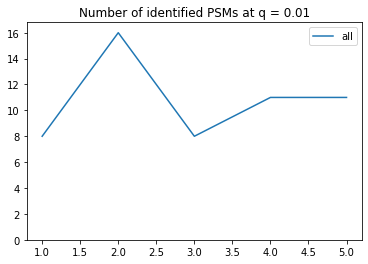

len / 2^11 => Using 25 PSMs:



ValueError: Dataset too small. There are not enough positive or negative examples to perform nested cross-validation.

In [9]:
%%time
import math

# aucs = []
# idents = []
dxl = dSlow.loc[dSlow['NuXL:isXL'] == 1]

saveName = ''

for portion in range(10,13):
    print('len / 2^{} => Using {} PSMs:\n'.format(portion, math.floor(len(dxl) / pow(2,portion))))
    dxl = dSlow.loc[dSlow['NuXL:isXL'] == 1]
    
    ix = list(dxl.index)
    newIx = [x for i,x in enumerate(ix) if (i % (math.pow(2,portion)) == 0)]
    
    pxl = percolator_experimental(dxl.loc[newIx], idCol, features, plotSaveName = saveName, plotXLnXL = False, centralScoringQ = 0.05)
    
    auct = pseudoROC(pxl, label = '', plot = False)
    aucs.append(auct)
    idents.append(len(pxl.loc[pxl['q-val'] <= 0.01]))

In [5]:
list(range(10,13))

[10, 11, 12]

[1.6169520423273802, 1.7532829513824926, 1.7932718332442144, 1.8255705603866585, 1.7330610262591464, 2.050746297732966, 1.5805493083964883, 3.3057809197704264, 1.0308087291399226, 1.0]
[1.74001268230818, 1.7945466074825618, 1.8022813688212929, 1.9215189873417722, 1.8131313131313131, 2.1717171717171717, 1.66, 2.28, 2.8461538461538463, 2.2857142857142856]


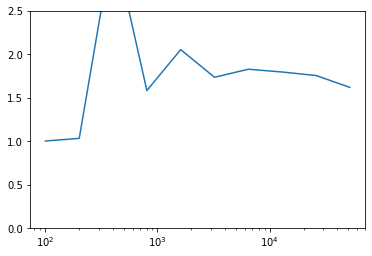

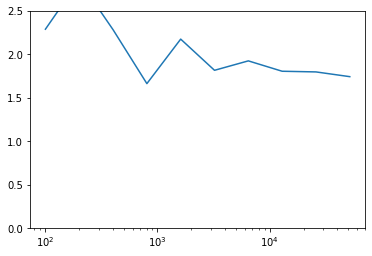

In [10]:
rangeOfi = 10
x = [len(dxl)/(math.pow(2,i)) for i in range(rangeOfi)]

ratioAUCs = [p / o if (o!=0) else p + 1 for p,o in zip(aucs,oriAUCs)]
ratioIdents = [p / o for p,o in zip(idents,oriIdents)]
plt.xscale('log')
plt.ylim(0,2.5)
#plt.yscale('log')
print(ratioAUCs)
print(ratioIdents)
plt.plot(x,ratioAUCs)
plt.show()
plt.ylim(0,2.5)
plt.xscale('log')
plt.plot(x,ratioIdents)

In [11]:
oriAUCs

[181.32015414316143,
 86.8725338896442,
 43.68192266633846,
 22.616052812258456,
 11.167249086475055,
 5.36195071338696,
 2.6461283537554703,
 0.8548387096774186,
 0.931818181818181,
 0.0,
 0.0,
 0.0,
 0.0]

In [12]:
aucs

[293.18599355690026,
 152.312132612111,
 78.33356153949677,
 41.28720020620894,
 19.353524162297973,
 10.996000574104945,
 4.182336339456547,
 2.8259094959327813,
 0.9605263157894726,
 0.0]

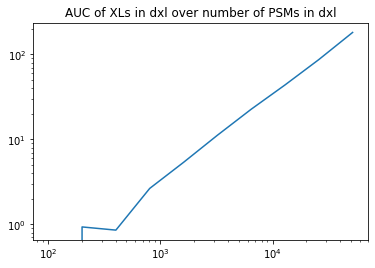

In [13]:
# AUCs of dSlow
plt.xscale('log')
plt.yscale('log')

plt.plot([len(dxl)/(math.pow(2,i)) for i in range(rangeOfi)], oriAUCs[:rangeOfi])
plt.title('AUC of XLs in dxl over number of PSMs in dxl')
plt.savefig('../results/ratioTests/aucs_dSlow.png')

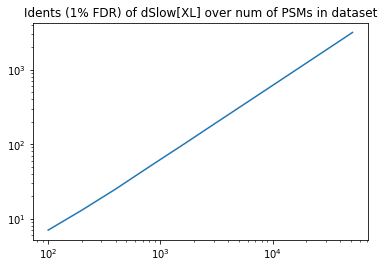

In [14]:
# Idents of dSlow
plt.xscale('log')
plt.yscale('log')

plt.plot([len(dxl)/(math.pow(2,i)) for i in range(rangeOfi)], oriIdents[:rangeOfi])
plt.title('Idents (1% FDR) of dSlow[XL] over num of PSMs in dataset')
plt.savefig('../results/ratioTests/idents_dSlow.png')

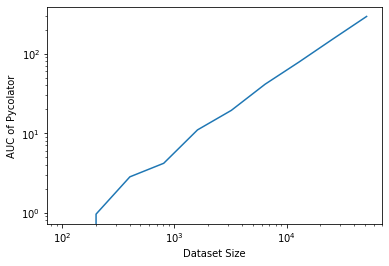

In [26]:
# AUCS of percolator
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dataset Size')
plt.ylabel('AUC of Pycolator')

plt.plot([len(dxl)/(math.pow(2,i)) for i in range(rangeOfi)], aucs[:rangeOfi])
# plt.title('AUC of percolator over number of PSMs in dxl')
plt.savefig('../results/ratioTests/aucs_perc.png')

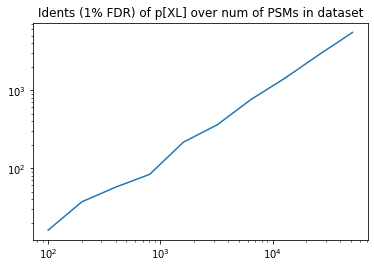

In [16]:
# Idents of percolator
plt.xscale('log')
plt.yscale('log')

plt.plot([len(dxl)/(math.pow(2,i)) for i in range(rangeOfi)], idents[:rangeOfi])
plt.title('Idents (1% FDR) of p[XL] over num of PSMs in dataset')
plt.savefig('../results/ratioTests/idents_perc.png')

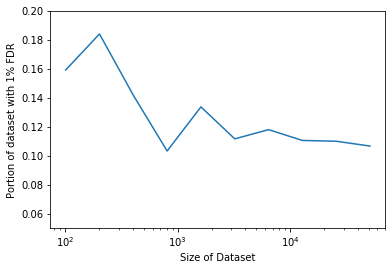

In [23]:
# ratio of idents in df of percolator
plt.xscale('log')
plt.ylim(0.05,0.2)
plt.xlabel('Size of Dataset')
plt.ylabel('Portion of dataset with 1% FDR')

plt.plot([len(dxl)/(math.pow(2,i)) for i in range(rangeOfi)],[idents[i]/(len(dxl)/(math.pow(2,i))) for i in range(rangeOfi)])
plt.savefig('../results/ratioTests/ratio_idents_whole_df_percolator.png')

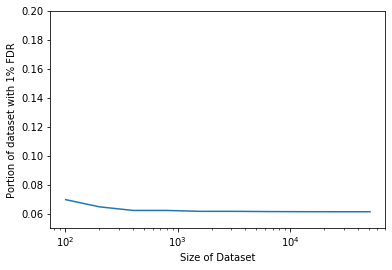

In [24]:
# ratio of idents in df of NuXL
plt.xscale('log')
plt.ylim(0.05,0.2)
plt.xlabel('Size of Dataset')
plt.ylabel('Portion of dataset with 1% FDR')

plt.plot([len(dxl)/(math.pow(2,i)) for i in range(rangeOfi)],[oriIdents[i]/(len(dxl)/(math.pow(2,i))) for i in range(rangeOfi)])
plt.savefig('../results/ratioTests/ratio_idents_whole_df_NuXL.png')

In [ ]:
[oriIdents[i]/(len(dxl)/(math.pow(2,i))) for i in range(rangeOfi)]